# Part I -  Gobike Data Exploration
## by Yelena N

## Introduction
> This document explores a dataset containing the trip data of the ford gobike approximately 183,412.


## Preliminary Wrangling


In [2]:
#import relevant libraries and packages 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
from zipfile import ZipFile
from io import BytesIO
!pip install geopy
from geopy import distance

    100% |████████████████████████████████| 122kB 5.8MB/s ta 0:00:01


In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [6]:
# change the data type for start and end time to be datetime64[ns] 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [7]:
 #assign proper data types to the start_time
df['start_time'] = pd.to_datetime(df['start_time'])

In [8]:
#split start_time into 'date' and 'ttime' columns
df['start_ttime'] = df['start_time'].dt.strftime('%H:%M')
df['start_date'] = df['start_time'].dt.strftime('%Y-%m-%d')

#extract 'hour' from start_time column
df['start_hour'] = df['start_time'].dt.strftime('%H')
df.head(5)

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip start_ttime  start_date start_hour  
0          Male                      No       17:32  2019-02-28         17  
1           NaN                      No       18:53  2019-02-28         18  
2          Male                      No       12:13  2019-02-28         12  
3         Other                      No       17:54  2019-02-28         17  
4          Male                     Yes       23:54  2019-02-28         23

In [9]:
#extract day from start_time column
df['start_day']=df['start_time'].dt.day_name()

#extract month from start_time column
df['start_month']=df['start_time'].dt.month_name()

df.head(5)

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

      ...      bike_id   user_type member_birth_year  member_gender  \
0     ...         4902    Customer            1984.0           Male   
1     ...         2535    Customer               NaN            NaN   
2     ...         5905    Customer            1972.0           Male   
3     ...         6638  Subscriber            1989.0          Other   
4     ...         4898  Subscriber            1974.0           Male   

  bike_share_for_all_trip start_ttime  start_date start_hour start_day  \
0                      No       17:32  2019-02-28         17  Thursday   
1                      No       18:53  2019-02-28         18  Thursday   
2                      No       12:13  2019-02-28         12  Thursday   
3                      No       17:54  2019-02-28         17  Thursday   
4                     Yes       23:54  2019-02-28         23  Thursday   

  start_month  
0    February  
1    February  
2    February  
3    February  
4    February  

[5 rows x 21 columns]

In [10]:
#convert 'start_hour' to int dtype
df['start_hour'] = df['start_hour'].astype('int')

#convert dtype of start_date, start_ttime columns into datetime object
df['start_ttime'] = pd.to_datetime(df['start_ttime'])
df['start_date'] = pd.to_datetime(df['start_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_ttime                183412 non-null datetime64[ns]
start_date

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_ttime                183412 non-null datetime64[ns]
start_date

In [12]:
#rename 'start_ttime' column
df.rename(columns = {'start_ttime':'start_time'}, inplace = True)
df.head(5)

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1         42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

      ...      bike_id   user_type member_birth_year  member_gender  \
0     ...         4902    Customer            1984.0           Male   
1     ...         2535    Customer               NaN            NaN   
2     ...         5905    Customer            1972.0           Male   
3     ...         6638  Subscriber            1989.0          Other   
4     ...         4898  Subscriber            1974.0           Male   

  bike_share_for_all_trip          start_time start_date start_hour  \
0                      No 2023-01-09 17:32:00 2019-02-28         17   
1                      No 2023-01-09 18:53:00 2019-02-28         18   
2                      No 2023-01-09 12:13:00 2019-02-28         12   
3                      No 2023-01-09 17:54:00 2019-02-28         17   
4                     Yes 2023-01-09 23:54:00 2019-02-28         23   

   start_day start_month  
0   Thursday    February  
1   Thursday    February  
2   Thursday    February  
3   Thursday    February  
4   Thursday    February  

[5 rows x 21 columns]

In [13]:
#remove latitude and longitude columns
df = df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'
        ])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
start_time                 183412 non-null datetime64[ns]
start_date                 183412 non-null datetime64[ns]
start_hour                 183412 non-null int64
start_day                  183412 non-null object
start_month                183412 non-null object
dtypes:

In [14]:
#check for missing values and duplicated rows
print(df.duplicated().sum())
print(df.isnull().sum())

0
duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
end_station_id              197
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
start_time                    0
start_date                    0
start_hour                    0
start_day                     0
start_month                   0
dtype: int64


In [15]:
# check for the percentage of missing values
missing_val_summary = (df.isnull().sum()/df.isnull().count())*100

display(missing_val_summary)

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
end_station_id             0.107408
end_station_name           0.107408
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
start_time                 0.000000
start_date                 0.000000
start_hour                 0.000000
start_day                  0.000000
start_month                0.000000
dtype: float64

In [16]:
df.duplicated().sum()

0

### What is the structure of your dataset?

> There are 183,412 data trips for fordgobike in the dataset with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most variables are 9 numerical, and others are 2 datetime, 4 object type and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

  >1. When are most trips taken in terms of time of day, day of the week, or month of the year?
  >2. How long does the average trip take?
  >3. What is the average distance travelled?
  >4. Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that start_time, end_time, duration_sec, user_type will have affect on final results and analisys

## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: duration_sec.

(0, 5000)

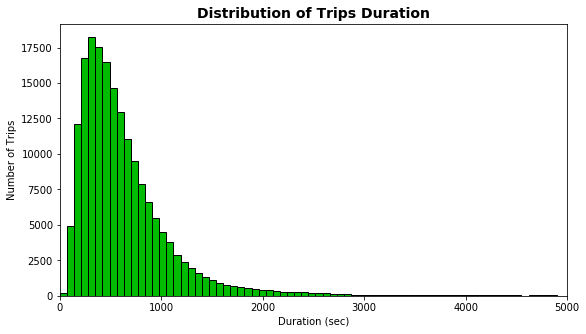

In [17]:
#what is the distribution of trip duration
plt.figure(figsize=[20,5]);
plt.subplot(1,2,1);
bins=np.arange(0, df['duration_sec'].max()+70, 70)
plt.hist(data= df, x='duration_sec',color = '#00BB00', bins = bins, edgecolor = 'black', linewidth = 1);
plt.xlabel('Duration (sec)');
plt.ylabel('Number of Trips');
plt.title('Distribution of Trips Duration', fontsize=14, fontweight='bold');
plt.xlim(0, 5000)

#### Number of trips generally reduced with increasing duration

### -What is the distribution of users according to the start hour?

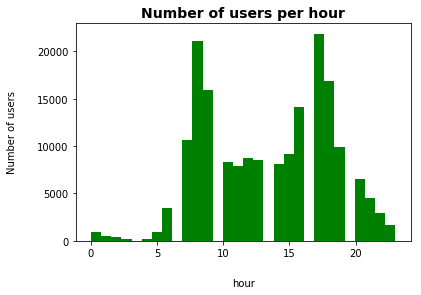

In [18]:
plt.hist(data = df, x = 'start_hour', bins=30,color='green')
plt.title("Number of users per hour", fontsize=14, fontweight='bold')
plt.xlabel("hour", labelpad=20)
plt.ylabel("Number of users", labelpad=20)
plt.show()

#### In the night hours the number of users decreases while it increases in the daytime hours.

### -What is the distribution of users according to week days?

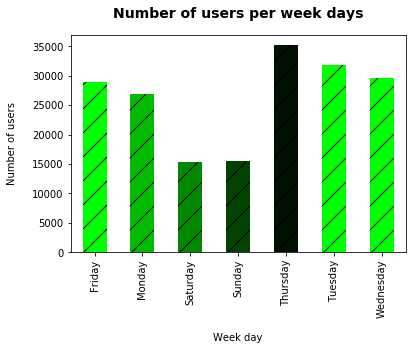

In [19]:
#Number of users per week days
colors = ['#00FF00', '#00BB00', '#008800', '#004400', '#001100']

# Plot the bar chart with hatched bars and the specified colors
df.groupby('start_day').size().plot(kind='bar', color = colors, hatch = '/')

plt.title('Number of users per week days',y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('Week day', labelpad=15)
plt.ylabel('Number of users', labelpad=15)
plt.show()

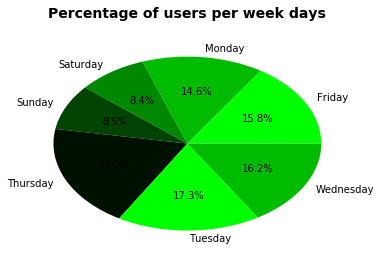

In [20]:
# Percentage of users per week days 
colors = ['#00FF00', '#00BB00', '#008800', '#004400', '#001100']

df.groupby('start_day').size().plot.pie(autopct='%1.1f%%', colors = colors)
plt.title('Percentage of users per week days',y=1.05, fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()

#### Thursday has the highest number of users, while Saturday has the lowest

## -What are the most and least used stations in the dataset?

In [21]:
df.start_station_name.value_counts().head(10)

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

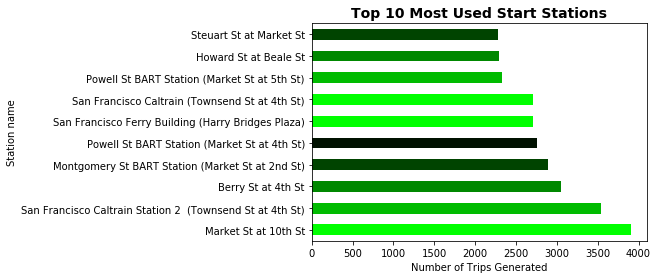

In [22]:
colors = ['#00FF00', '#00BB00', '#008800', '#004400', '#001100']

df.start_station_name.value_counts().head(10).plot.barh(color=colors)
plt.ylabel("Station name")
plt.xlabel("Number of Trips Generated")
plt.title("Top 10 Most Used Start Stations", fontsize=14, fontweight='bold')
plt.show()

### This shows that the station at 10th street is the major trip generator and generates over 3500 trips in a month

In [23]:
df.start_station_name.value_counts().tail(10)

23rd Ave at Foothill Blvd                18
Farnam St at Fruitvale Ave               18
Leavenworth St at Broadway               17
Backesto Park (Jackson St at 13th St)    17
Taylor St at 9th St                      13
Willow St at Vine St                      9
Parker Ave at McAllister St               7
21st Ave at International Blvd            4
Palm St at Willow St                      4
16th St Depot                             2
Name: start_station_name, dtype: int64

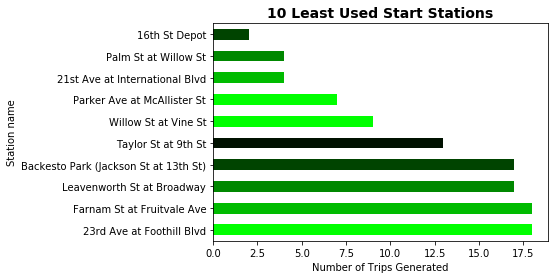

In [24]:
#0 least used stations/# Create a list of colors in a greenish color palette
colors = ['#00FF00', '#00BB00', '#008800', '#004400', '#001100']

df.start_station_name.value_counts().tail(10).plot.barh(color=colors)
plt.ylabel("Station name")
plt.xlabel("Number of Trips Generated")
plt.title("10 Least Used Start Stations", fontsize=14, fontweight='bold')
plt.show()

### The Depot is the least used trip station with only 2 trips generated this month

### -Next up I'll move on to the other variables in the dataset: age, user type, and gender.

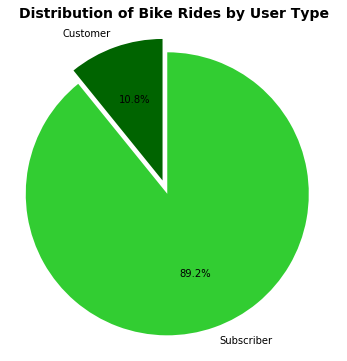

In [25]:
#What is the distribution of bike users by user type (piechart)
colors = ['limegreen', 'darkgreen']
plt.figure(figsize=[6,6])
explode= (0.02, 0.08)
sorted_counts=df['user_type'].value_counts()
plt.pie(sorted_counts, labels= sorted_counts.index, explode=explode, autopct='%1.1f%%', startangle=90, 
        shadow= False, counterclock= False,colors=colors);
plt.axis('square');
plt.title('Distribution of Bike Rides by User Type', fontsize=14, fontweight='bold');

19.4% of bike rides were taken by customers, while 80.6% were taken by subscribers

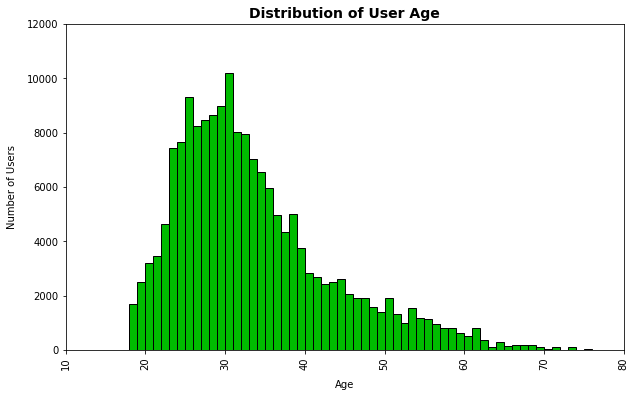

In [26]:
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df.dropna(), x = 'member_birth_year', color = '#00BB00', bins = bins, edgecolor = 'black', linewidth = 1)
plt.axis([1939, 2009, 0, 12000])
plt.xticks(range(1939, 2010, 10), [(2019-year) for year in range(1939, 2010, 10)], rotation=90)
plt.gca().invert_xaxis()
plt.title('Distribution of User Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', labelpad=10)
plt.ylabel('Number of Users', labelpad=10)
plt.show()

### We see that the distribution is more concentrated between 20 to 40 years old.

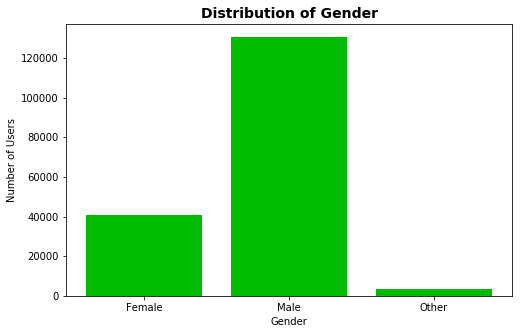

In [27]:
## plotting genders 
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts(), color = '#00BB00' )

# Set the labels for the plot
plt.title('Distribution of Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Number of Users')

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Generally, around 90% of rides take place on weekday. Also, more than 70% of users are in 20 to 40 years old age(when mean age is 32). In addition, 76% of bike rides by male. Moreover, the peak bike rides time for all members is around commute time(a quarter of the total rides happen exactly at 8am and 5pm). Seeing all these, the user persona of the Ford goBike can be inferred as a 32 old man who is working for tech company around market street.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 89% of rides are from subscribers and the rest 11% are from customers. Also, Average trip duration for subscribers are 12minutes, which is about a third of customers'. Since bike rides has no cost on each ride, it's recommendable to encourage subscription. Subscribers' rides take place around commute time, on the contrary customers' rides take place the most during weekend, which represents the main purpose for the user type is different. The former is for convenience around commute time and the latter is more likely for leisure.

## Bivariate Exploration


### To start off with, I want to look at the duration in seconds correlations present between features such as:
    age, user type, and gender, bike usage in the data.

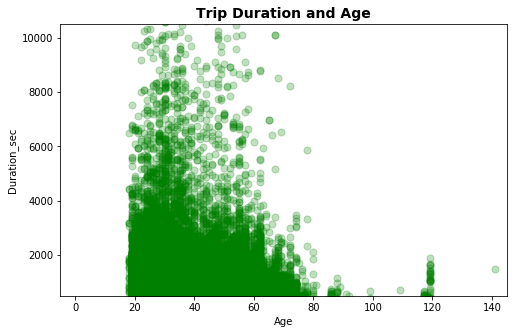

In [28]:
plt.figure(figsize=[8,5])
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, s = 200, marker = '.', color = 'green' )
plt.axis([-5, 145, 500, 10500])
plt.title('Trip Duration and Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

Text(0,0.5,'Duaration_sec')

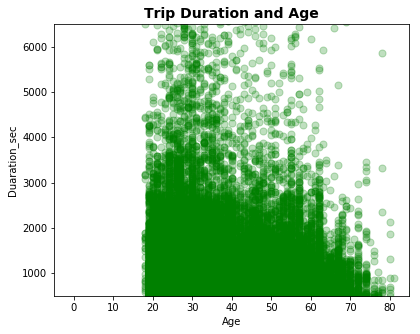

In [29]:
# As you can see, the most of the durations are below 6000 and age is below 80, I need to crop the plot to those values.

plt.figure(figsize=[14,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, s = 200, marker = '.', color = 'green' )
plt.axis([-5, 85, 500, 6500])
plt.title('Trip Duration and Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Duaration_sec')

#### By looking at the chart above, we can see that most frequent users aged between 20 and 45. As remark, duration is registered by younger members.

## Let's look at the bar chart of the Percentage of all bike rides per gender

In [30]:
trip_by_gender_df = df.groupby('member_gender').agg({'bike_id':'count'})

In [31]:
trip_by_gender_df['perc'] = (trip_by_gender_df['bike_id']/trip_by_gender_df['bike_id'].sum())*100

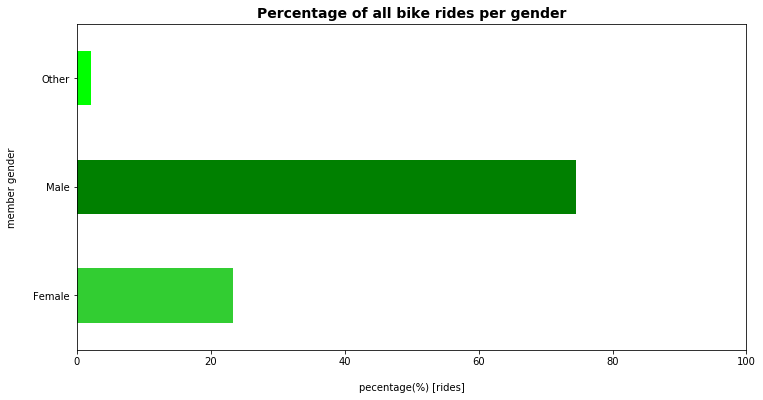

In [32]:
new_color = ['limegreen', 'green', 'lime']
trip_by_gender_df['perc'].plot(kind='barh', color=new_color, figsize=(12,6))
plt.title('Percentage of all bike rides per gender', fontsize=14, fontweight='bold')
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)
plt.savefig('image03.png');

#### Male took 76% of all bike rides, and female took 22% of them.

### -What is the number of users per week days according to their types?

In [33]:
ct_counts = df.groupby(['start_day', 'user_type']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'start_day', columns = 'user_type', values = 'count')
ct_counts

user_type  Customer  Subscriber
start_day                      
Friday         3030       25951
Monday         2741       24111
Saturday       2739       12666
Sunday         2896       12627
Thursday       3390       31807
Tuesday        2606       29207
Wednesday      2466       27175

In [56]:

def plot_1(data, x_, y_, x_label, y_label, title):
    """Plotting number of users per week """
    ct_counts = data.groupby([x_,y_]).size()
    ct_counts= ct_counts.reset_index(name= 'count')
    ct_count = ct_counts.pivot(index = x_, columns = y_, values = 'count')
    sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap="Greens")
    plt.title(title, y=1.05, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, labelpad=15)
    plt.ylabel(y_label, labelpad=15)
     
    
    plot_1(data = df,x_="start_day", y_="user_type", x_label = "user type",
       y_label = "week day", title = "Number of users per week days according to their types")
    

Text(33,0.5,'week day')

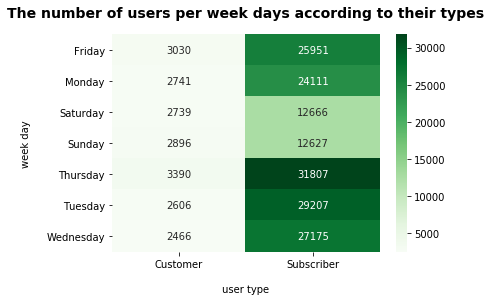

In [52]:

sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap="Greens")
plt.title('The number of users per week days according to their types', y=1.05, fontsize=14, fontweight='bold')
plt.xlabel('user type', labelpad=15)
plt.ylabel('week day', labelpad=15)

#### Subscribers are the largest number, and both user types increase in number on Thursday.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip Duration is so dependendable on the age of the member, when the age between 20 to 45, the trip duration is higher than the older ages.
we can see that higher percentage of female and other rides longer trips then males although number of male riders are very high then other and female.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I thought that variables which are user type and gender values having higher value to get higher trip duration but it is the opposite. For gender, value of male members is very high but it got lower trip duration. For user type, value of subscriber members is very high but it got lower trip duration then customer.

>Customers generally travelled longer periods by hour, day, and month compared to subscribers. Similarly, customers generally travelled longer distance by month and day compared to subscribers. However, from midnight to 6am, distance travelled by subscribers were either higher than that travelled by customers, or almost equal to.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### The main thing I want to explore in this part of the analysis is
how the three categorical measures of user type and gender into the relationship between trip duration and age.

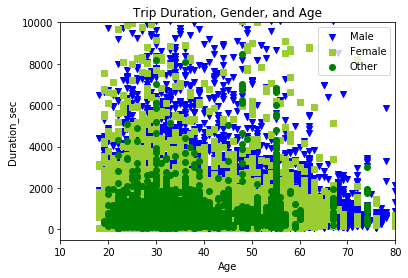

In [37]:
gender_mark = [['Male', 'v', 'blue'],['Female', 's', 'yellowgreen'],['Other', 'o', 'green']]

for gender, marker, color in gender_mark:
    df_gender = df[df['member_gender'] == gender]
    plt.scatter((2019 - df_gender['member_birth_year']), df_gender['duration_sec'], marker = marker, alpha= 1, color=color)
plt.legend(['Male','Female','Other'])
plt.axis([10, 80, -500, 10000 ])
plt.title('Trip Duration, Gender, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

#### The plot is not clear, so let's separate all three genders into different graphs.

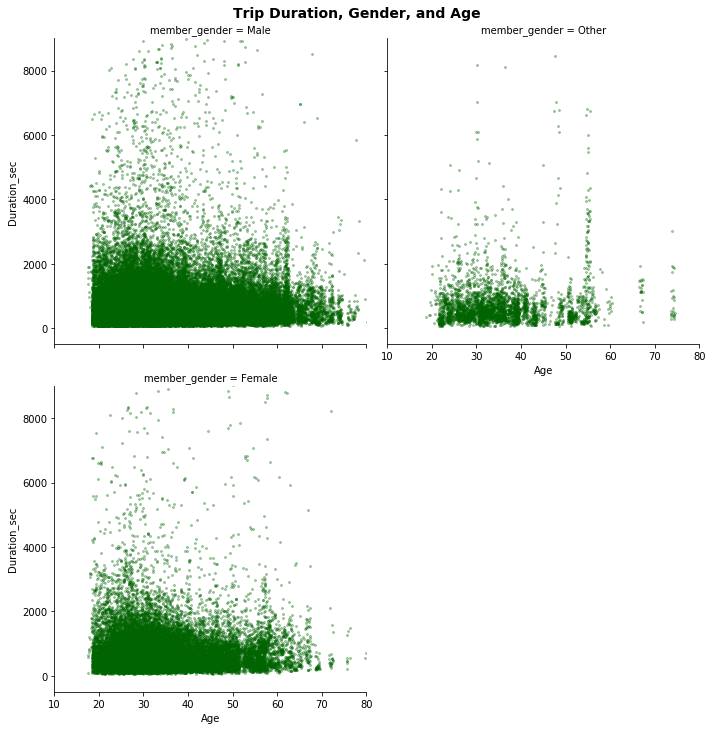

In [57]:

# Add jitter to the data points
jitter = np.random.uniform(-0.5, 0.5, size=df.shape[0])
df['age'] = (2019 - df['member_birth_year']) + jitter

# Create the plot
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha= 0.3, s = 4, color = 'darkgreen')

# Add titles and labels
gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration, Gender, and Age', y=1.01 ,fontsize=14, fontweight='bold')

# Show the plot
plt.show()

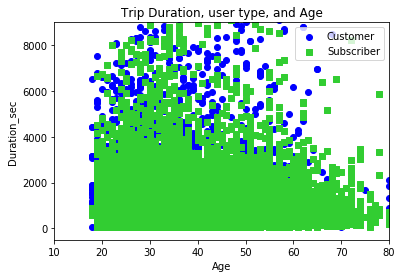

In [38]:
usertype_mark = [['Customer', 'o', 'blue'],['Subscriber', 's', 'limegreen']]

for utype, marker, color in usertype_mark:
    df_utype = df[df['user_type'] == utype]
    plt.scatter((2019 - df_utype['member_birth_year']), df_utype['duration_sec'], marker = marker, alpha= 1, color=color)
plt.legend(['Customer','Subscriber'])
plt.axis([10, 80, -500, 9000 ])
plt.title('Trip Duration, user type, and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

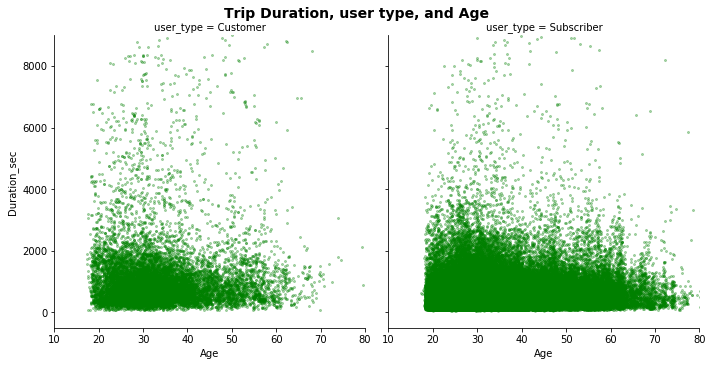

In [58]:
# Add random noise to the age column
df['age_jittered'] = df['age'] + np.random.rand(len(df)) - 0.5

# Create the plot using the jittered age column
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_type.map(plt.scatter, 'age_jittered', 'duration_sec', alpha= 0.3, s = 4, color = 'green')

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
user_type.fig.suptitle('Trip Duration, user type, and Age',y=1.01, fontsize=14, fontweight='bold')
plt.show()

For the age, duration, and gender, for the others leap at an older age (around 60 years) to got 3000 trip duration.

For the age, duration, and user type,
both Customer and Subscriber are showing similar trends for age and trip duration,
but for subscribers the trip duration is higher for older age.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed that although the number of users for male is higher but percentage is higher for women and other in trip duration. And,for the others leap at an older age (around 60 years) to got 3000 trip duration which is a peak. Also, for subscribers the trip duration is higher than customer for older age.

### Were there any interesting or surprising interactions between features?

> Looking back on the plots, leaping for other gender at an older is a surprise. And, for subscribers the trip duration is higher than customer for older age is a surprise

>From the dataset it can be observed that differebt age groups use bikes differently, the youngest are more active at midnight and the young adults are more active during work hours. I also discovered that though the male gender are the most represented in the data set, they cover relatively smaller distances than other genders and spend relatively shorter time in transit.

In [ ]:
!jupyter nbconvert Part_I_gobike.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_I_gobike.ipynb to slides
[NbConvertApp] Writing 1084013 bytes to Part_I_gobike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_I_gobike.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not found
/usr/bin